**IMPORT THE NECESSARY LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**READ THE DATASET**

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


**PERFROM EXPLORATORY DATA ANALYSIS**

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [10]:
df['Cancer Present'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

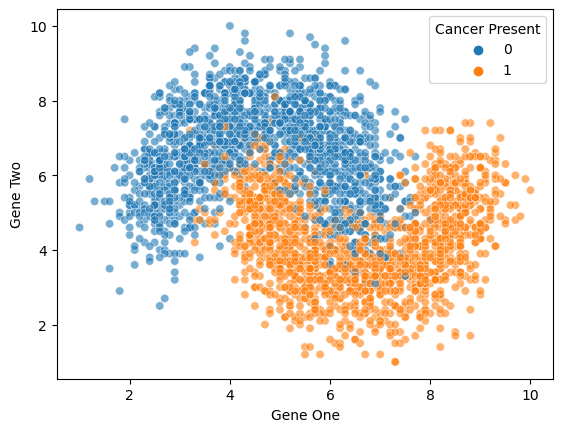

In [8]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha= 0.6)

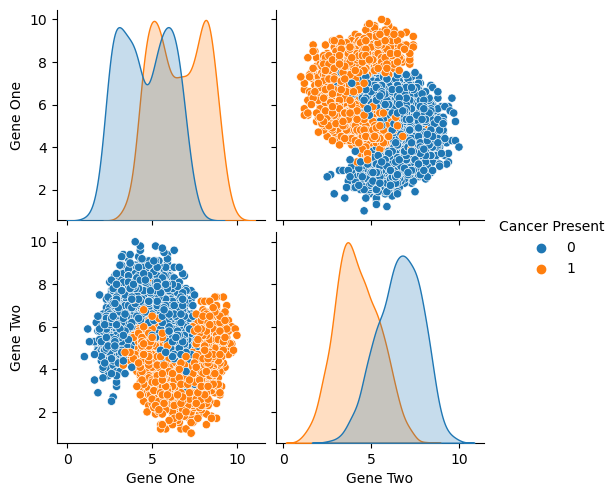

In [9]:
sns.pairplot(data=df, hue='Cancer Present')

**CREATE THE FEATURES AND LABEL**

In [11]:
X = df.drop('Cancer Present', axis=1)

In [12]:
y = df['Cancer Present']

In [13]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [14]:
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


**PERFROM TRAIN TEST SPLIT**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**CREATE AN INSTANCE OF A SCALER**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**FIT AND TRANSFORM THE SCALER ON THE FEATURE DATASETS**

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**CREATE AN INSTANCE OF THE KNN MODEL**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)

**FIT MODEL TO THE SCALED TRAIN FEATURE AND LABEL**

In [19]:
KNN_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**PREDICT WITH THE MODEL ON THE TEST DATASET**

In [20]:
pred = KNN_model.predict(scaled_X_test)

In [21]:
pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

**EVALUATE THE ACCURACY OF THE MODEL**

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

In [24]:
accuracy

0.9166666666666666

**EVALUATE THE ERROR BETWEEN GROUND TRUTH TEST DATA AND MODEL PREDICTION**

In [25]:
error = 1 - accuracy

In [26]:
error

0.08333333333333337

**EVALUATE THE CONFUSION MATRIX**

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

confusion_matrix(y_test, pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

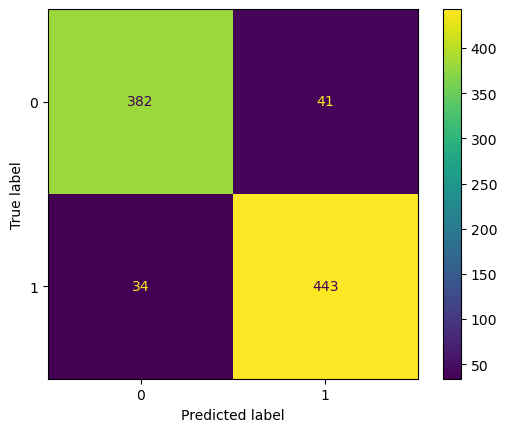

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

**GENERATE THE CLASSIFICATION REPORT**

In [29]:
classification_report = classification_report(y_test, pred)

In [30]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



**DETERMINING OPTIMAL K NEIGHBORS USING ELBOW METHOD**

In [31]:
test_error_rate = []

for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    pred = model.predict(scaled_X_test)
    acc = accuracy_score(y_test, pred)
    error = 1 - acc
    test_error_rate.append(error)

In [32]:
test_error_rate

[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

Text(0, 0.5, 'ERROR RATE')

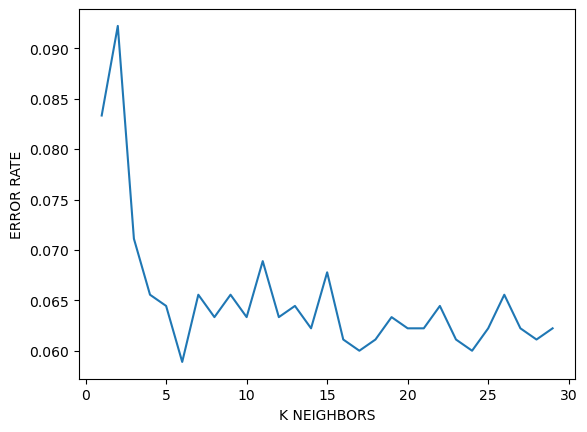

In [34]:
plt.plot(range(1,30),test_error_rate)
plt.xlabel('K NEIGHBORS')
plt.ylabel('ERROR RATE')

**CREATE THE FINAL MODEL**

In [74]:
Final_KNN_model = KNeighborsClassifier(n_neighbors=6)

In [75]:
Final_KNN_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [76]:
predc = Final_KNN_model.predict(scaled_X_test)

In [77]:
predc

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [78]:
y_test

45      1
668     1
1650    0
1247    0
18      1
       ..
1009    0
1638    1
44      1
2319    0
368     1
Name: Cancer Present, Length: 900, dtype: int64

In [79]:
acc_score = accuracy_score(y_test,predc)

In [80]:
acc_score

0.9411111111111111

In [81]:
model_error = 1 - acc_score

In [82]:
model_error

0.05888888888888888

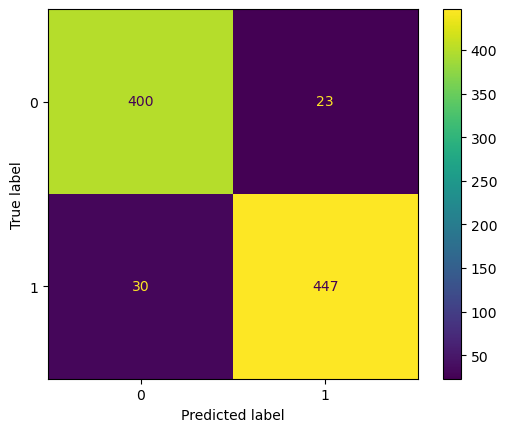

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,predc)

In [85]:
from sklearn.metrics import classification_report
classification_reports = classification_report(y_test, predc)

In [86]:
print(classification_reports)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       423
           1       0.95      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



**TEST ON A SINGLE DATA POINT**

In [89]:
Final_KNN_model.predict([[7.4, 3.4],[5.4, 9.4],[3.8, 6.4]])

array([1, 0, 0], dtype=int64)

In [90]:
Final_KNN_model.predict_proba([[7.4, 3.4],[5.4, 9.4],[3.8, 6.4]])

array([[0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333]])